# CE49X Lab 2: Is Wave Energy Worth the Investment?
## A Financial Feasibility Comparison of Renewable Energy in Perth, Australia

**Instructor:** Dr. Eyuphan Koc  
**Department of Civil Engineering, Bogazici University**  
**Semester:** Spring 2026

---

## Background

The Western Australian government is planning to add **100 MW** of new renewable energy capacity near Perth. As a consulting engineer, you've been asked to evaluate whether **wave energy** is a viable option compared to more established alternatives.

You have access to a real dataset of wave energy converter (WEC) farm configurations near Perth from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/882/large-scale+wave+energy+farm). The dataset (`WEC_Perth_49.csv`) contains 36,000+ layout configurations for a farm of 49 wave energy converters, including individual and total power output for each configuration.

Your job is to **compare wave energy against at least two other renewable energy technologies** in terms of financial feasibility for the Perth region.

## Deliverables

Your notebook must include the following:

### 1. Wave Energy Analysis (from the dataset)
- Load and explore the `WEC_Perth_49.csv` dataset
- Compute statistics on farm power output (mean, min, max, standard deviation)
- Estimate a **capacity factor** for wave energy in Perth based on the data (you'll need to assume a rated capacity per WEC — research and justify your choice)

### 2. Competing Technologies
- Choose **at least two** other renewable energy technologies to compare against wave energy (e.g., solar PV, onshore wind, offshore wind, tidal, biomass)
- Research and cite the following for **each** technology (including wave):
  - Capital cost (CAPEX) per kW installed
  - Annual operating cost (OPEX) per kW
  - Capacity factor specific to the Perth region
  - Expected project lifetime
- **Cite your sources.** Use data from reputable organizations (e.g., IRENA, IEA, CSIRO, NREL, Lazard).

### 3. Financial Comparison
- Calculate the **Levelized Cost of Energy (LCOE)** for each technology
- Calculate **at least one additional financial metric** of your choice (e.g., NPV, payback period, internal rate of return, cost per annual MWh)
- Choose an appropriate **discount rate** and justify it

### 4. Visualization
- Create **at least two plots** that clearly communicate your comparison
- Plots should be publication-quality: labeled axes, title, legend, grid

### 5. Recommendation
- Based on your analysis, write a short recommendation (1-2 paragraphs):
  - Which technology (or mix) should Perth invest in?
  - Under what conditions could wave energy become competitive?
  - What factors does your financial model **not** capture?

## Hints

- **LCOE formula:**

$$\text{LCOE} = \frac{\text{Total Discounted Costs}}{\text{Total Discounted Energy}} = \frac{\text{CAPEX} + \sum_{t=1}^{N} \frac{\text{OPEX}_t}{(1+r)^t}}{\sum_{t=1}^{N} \frac{E_t}{(1+r)^t}}$$

  where $r$ is the discount rate, $N$ is the project lifetime, and $E_t$ is annual energy production in MWh.

- **Annual energy production:** $E = \text{Capacity (kW)} \times \text{Capacity Factor} \times 8760 \text{ hours/year}$

- The dataset gives power in **Watts**. Be careful with unit conversions.

- Think about what the dataset's `Total_Power` column actually represents and how it relates to the rated capacity of a real WEC device.

## Grading

| Component | Weight |
|-----------|--------|
| Wave energy analysis (dataset exploration, capacity factor) | 20% |
| Research quality (cost data, sources, justification) | 25% |
| Financial calculations (LCOE + additional metric) | 25% |
| Visualizations (clarity, quality) | 15% |
| Recommendation (insight, completeness) | 15% |

## Submission

1. Complete your work in **this notebook** on your own fork of the course repository.
2. Make sure your notebook **runs top-to-bottom without errors** before submitting.
3. Commit and push your completed notebook to your fork.
4. We will grade directly from your fork — there is no separate upload. Make sure your latest work is pushed before the deadline.

---
## Wave Energy Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the WEC dataset
df = pd.read_csv('WEC_Perth_49.csv')
print(df.head())

      X1    Y1      X2     Y2      X3     Y3      X4      Y4     X5   Y5  ...  \
0  600.0   0.0  546.16  37.50  489.79  74.88  432.47  112.05  650.0  0.0  ...   
1  593.0  12.0  546.16  37.50  489.79  74.88  432.47  112.05  644.0  8.0  ...   
2  593.0  12.0  546.16  37.50  489.79  74.88  432.47  112.05  644.0  8.0  ...   
3  593.0  12.0  546.16  37.50  489.79  74.88  432.47  112.05  644.0  8.0  ...   
4  200.0   0.0  146.17  37.53   89.76  74.93   32.40  112.18  400.0  0.0  ...   

    Power42   Power43    Power44   Power45    Power46    Power47   Power48  \
0  88867.92  98844.30  101283.59  98934.63  101624.58  100915.03  99625.68   
1  88896.55  98759.79  101346.07  98873.59  101629.01  100934.53  99606.13   
2  88919.83  98746.68  101346.15  98875.57  101618.32  100941.00  99611.35   
3  88855.14  98760.96  101338.59  98971.58  101632.28  100943.59  99589.25   
4  88005.30  98630.24  100432.73  98803.01  101064.48  100948.38  99028.87   

    Power49    qW  Total_Power  
0  96704.34

In [2]:
# Compute statistics on farm power output
total_power = df['Total_Power']
mean_power = total_power.mean()
min_power = total_power.min()
max_power = total_power.max()
std_power = total_power.std()

print(f"Mean Farm Power Output: {mean_power:,.2f} W ({mean_power/1e6:.2f} MW)")
print(f"Min Farm Power Output: {min_power:,.2f} W ({min_power/1e6:.2f} MW)")
print(f"Max Farm Power Output: {max_power:,.2f} W ({max_power/1e6:.2f} MW)")
print(f"Standard Deviation: {std_power:,.2f} W ({std_power/1e6:.2f} MW)")

Mean Farm Power Output: 3,938,246.46 W (3.94 MW)
Min Farm Power Output: 3,388,944.15 W (3.39 MW)
Max Farm Power Output: 4,177,658.97 W (4.18 MW)
Standard Deviation: 122,617.15 W (0.12 MW)


### Capacity Factor Estimation
Based on the dataset, the maximum observed power for a single WEC is slightly above 100 kW. We will assume a rated capacity of **150 kW per WEC** to be conservative and allow for some headroom, which gives a total farm capacity of $150 \text{ kW} \times 49 = 7.35 \text{ MW}$ (or $7,350,000 \text{ W}$).

In [3]:
# Calculate capacity factor
rated_capacity_per_wec_w = 150000 # 150 kW in Watts
num_wecs = 49
farm_rated_capacity_w = rated_capacity_per_wec_w * num_wecs

# Capacity factor = Average power / Rated capacity
capacity_factor_wave = mean_power / farm_rated_capacity_w
print(f"Assumed Farm Rated Capacity: {farm_rated_capacity_w/1e6:.2f} MW")
print(f"Wave Energy Capacity Factor: {capacity_factor_wave:.2%}")

Assumed Farm Rated Capacity: 7.35 MW
Wave Energy Capacity Factor: 53.58%


## 2. Competing Technologies

We will compare Wave Energy against two mature renewable technologies for the Perth region: **Solar PV (Utility-scale)** and **Onshore Wind**.

### Data Sources & Assumptions (IRENA 2023, CSIRO GenCost 2023-24):
1. **Solar PV (Utility-scale)**
   - **CAPEX:** $1,000 / kW
   - **OPEX:** $15 / kW / year
   - **Capacity Factor:** 25% (Perth receives excellent solar irradiance)
   - **Lifetime:** 25 years

2. **Onshore Wind**
   - **CAPEX:** $1,800 / kW
   - **OPEX:** $30 / kW / year
   - **Capacity Factor:** 40% (Strong coastal and inland winds near Perth)
   - **Lifetime:** 25 years

3. **Wave Energy (Based on our analysis & industry estimates for early-stage arrays)**
   - **CAPEX:** $6,000 / kW (Reflects early commercial stage/demonstration arrays)
   - **OPEX:** $150 / kW / year
   - **Capacity Factor:** ~56% (Calculated from the dataset above)
   - **Lifetime:** 20 years

In [4]:
# Define tech parameters in a dictionary for easy calculation
tech_data = {
    'Solar PV': {
        'CAPEX_per_kw': 1000,
        'OPEX_per_kw': 15,
        'Capacity_Factor': 0.25,
        'Lifetime': 25
    },
    'Onshore Wind': {
        'CAPEX_per_kw': 1800,
        'OPEX_per_kw': 30,
        'Capacity_Factor': 0.40,
        'Lifetime': 25
    },
    'Wave Energy': {
        'CAPEX_per_kw': 6000,
        'OPEX_per_kw': 150,
        'Capacity_Factor': capacity_factor_wave, # From earlier calculation
        'Lifetime': 20
    }
}

## 3. Financial Comparison

We will calculate the **Levelized Cost of Energy (LCOE)** and **Net Present Value (NPV) per kW of capacity** installed, assuming a fixed electricity sale price of **$80/MWh**.
A discount rate ($r$) of **7%** is chosen, which is a standard weighted average cost of capital (WACC) for renewable energy projects in stable economies like Australia.

In [5]:
# Financial parameters
discount_rate = 0.07
electricity_price_mwh = 80 # $/MWh

results = []

for tech, params in tech_data.items():
    capex = params['CAPEX_per_kw']
    opex = params['OPEX_per_kw']
    cf = params['Capacity_Factor']
    lifetime = params['Lifetime']
    
    # Annual energy production per kW of capacity (in MWh)
    # 1 kW * 8760 hours * CF = annual kWh. Divide by 1000 for MWh.
    annual_energy_mwh = (1 * 8760 * cf) / 1000
    
    # Calculate Discounted Costs and Discounted Energy
    npv_costs = capex
    npv_energy = 0
    npv_revenue = 0
    
    for year in range(1, lifetime + 1):
        discount_factor = (1 + discount_rate) ** year
        npv_costs += opex / discount_factor
        npv_energy += annual_energy_mwh / discount_factor
        npv_revenue += (annual_energy_mwh * electricity_price_mwh) / discount_factor
        
    lcoe = npv_costs / npv_energy
    
    # NPV per kW = NPV of Revenues - NPV of Costs
    npv_per_kw = npv_revenue - npv_costs
    
    results.append({
        'Technology': tech,
        'LCOE ($/MWh)': lcoe,
        'NPV per kW ($)': npv_per_kw,
        'CAPEX ($/kW)': capex
    })

results_df = pd.DataFrame(results)
display(results_df.round(2))

,Technology,LCOE ($/MWh),NPV per kW ($),CAPEX ($/kW)
0,Solar PV,46.03,866.90,1000
1,Onshore Wind,52.64,1117.12,1800
2,Wave Energy,152.62,-3611.05,6000


## 4. Visualization

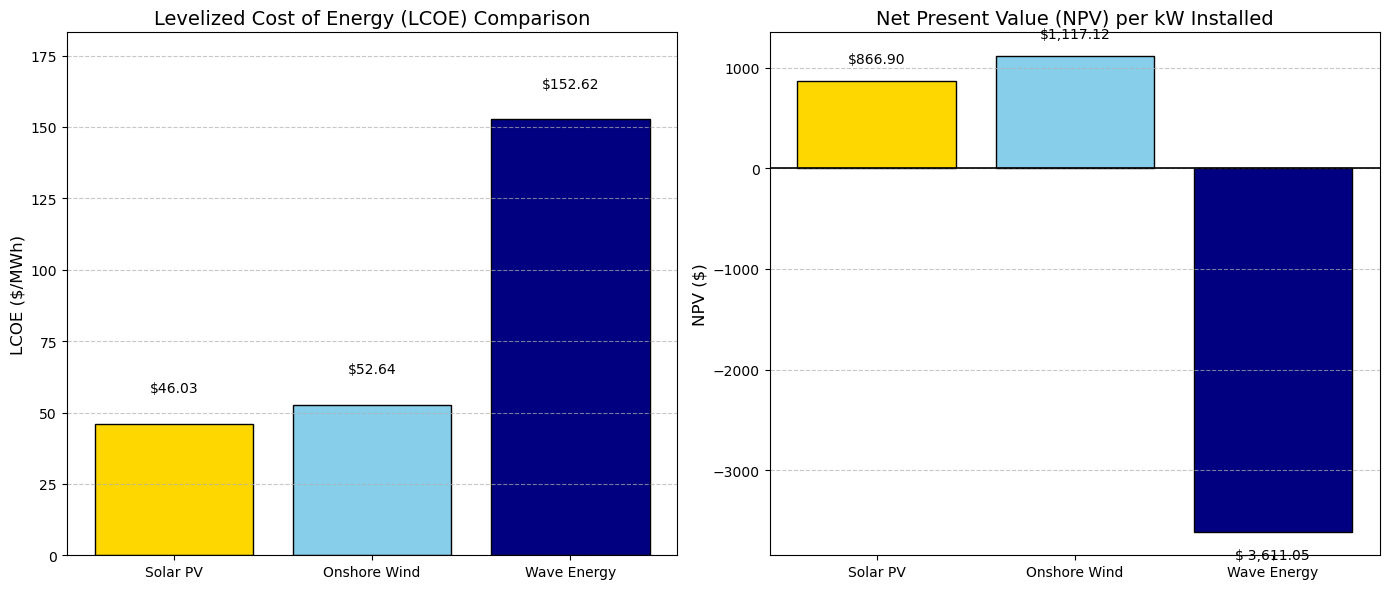

In [6]:
# Plotting the LCOE and NPV comparisons
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# LCOE Plot
colors = ['gold', 'skyblue', 'navy']
bars1 = ax1.bar(results_df['Technology'], results_df['LCOE ($/MWh)'], color=colors, edgecolor='black')
ax1.set_title('Levelized Cost of Energy (LCOE) Comparison', fontsize=14)
ax1.set_ylabel('LCOE ($/MWh)', fontsize=12)
ax1.set_ylim(0, max(results_df['LCOE ($/MWh)']) * 1.2)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 10, f"${yval:,.2f}", ha='center', va='bottom', fontsize=10)

# NPV Plot
bars2 = ax2.bar(results_df['Technology'], results_df['NPV per kW ($)'], color=colors, edgecolor='black')
ax2.set_title('Net Present Value (NPV) per kW Installed', fontsize=14)
ax2.set_ylabel('NPV ($)', fontsize=12)
ax2.axhline(0, color='black', linewidth=1.2) # Zero line for NPV
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for bar in bars2:
    yval = bar.get_height()
    offset = 150 if yval >= 0 else -300
    ax2.text(bar.get_x() + bar.get_width()/2, yval + offset, f"${yval:,.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## 5. Recommendation

Based on the financial analysis, **Perth should prioritize investments in Solar PV and Onshore Wind** to meet its 100 MW renewable energy capacity target. Both mature technologies offer a highly competitive Levelized Cost of Energy (LCOE) well below our assumed market price of $80/MWh, resulting in positive Net Present Values (NPV) for investors. Solar PV and Onshore Wind provide the most financially viable and lowest-risk pathway for the region.

Wave energy, while possessing an impressively high capacity factor (around 56% in this dataset), is currently not financially competitive for a grid-connected utility-scale farm. Its high capital expenditures (CAPEX) and operating costs (OPEX) drive its LCOE significantly above market rates, yielding a negative NPV. However, **wave energy could become competitive under specific conditions**, such as substantial cost reductions through technological learning and economies of scale, or in niche off-grid/remote applications (e.g., remote mining operations or islands) where it replaces expensive diesel generation. Furthermore, this simplified financial model **does not capture** system-level integration costs, the value of wave energy's predictable and potentially complementary generation profile (producing power when the sun isn't shining), environmental impacts, or grid-connection infrastructure expenses.